## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9984236	total: 70ms	remaining: 1m 9s
1:	learn: 0.9800276	total: 71.4ms	remaining: 35.6s
2:	learn: 0.9601851	total: 72.7ms	remaining: 24.2s
3:	learn: 0.9436694	total: 73.8ms	remaining: 18.4s
4:	learn: 0.9275517	total: 75ms	remaining: 14.9s
5:	learn: 0.9130825	total: 76.2ms	remaining: 12.6s
6:	learn: 0.8955652	total: 77.2ms	remaining: 11s
7:	learn: 0.8789848	total: 78.3ms	remaining: 9.7s
8:	learn: 0.8626065	total: 79.3ms	remaining: 8.73s
9:	learn: 0.8462768	total: 80.4ms	remaining: 7.96s
10:	learn: 0.8303836	total: 81.4ms	remaining: 7.32s
11:	learn: 0.8152616	total: 82.4ms	remaining: 6.78s
12:	learn: 0.8011620	total: 83.4ms	remaining: 6.33s
13:	learn: 0.7861922	total: 84.5ms	remaining: 5.95s
14:	learn: 0.7727628	total: 85.5ms	remaining: 5.61s
15:	learn: 0.7590373	total: 86.4ms	remaining: 5.31s
16:	learn: 0.7465107	total: 87.5ms	remaining: 5.06s
17:	learn: 0.7333456	total: 88.4ms	remaining: 4.83s
18:	learn: 0.7212591	total: 89.3ms	remaining: 4.61s

41:	learn: 0.5149751	total: 110ms	remaining: 2.52s
42:	learn: 0.5075552	total: 111ms	remaining: 2.48s
43:	learn: 0.5007656	total: 113ms	remaining: 2.45s
44:	learn: 0.4948074	total: 114ms	remaining: 2.41s
45:	learn: 0.4886951	total: 115ms	remaining: 2.38s
46:	learn: 0.4845160	total: 115ms	remaining: 2.34s
47:	learn: 0.4783087	total: 116ms	remaining: 2.3s
48:	learn: 0.4735325	total: 117ms	remaining: 2.27s
49:	learn: 0.4684578	total: 118ms	remaining: 2.24s
50:	learn: 0.4641506	total: 119ms	remaining: 2.21s
51:	learn: 0.4593285	total: 119ms	remaining: 2.17s
52:	learn: 0.4543100	total: 120ms	remaining: 2.15s
53:	learn: 0.4503615	total: 121ms	remaining: 2.12s
54:	learn: 0.4454422	total: 122ms	remaining: 2.09s
55:	learn: 0.4411449	total: 122ms	remaining: 2.06s
56:	learn: 0.4378713	total: 123ms	remaining: 2.04s
57:	learn: 0.4343589	total: 124ms	remaining: 2.01s
58:	learn: 0.4307960	total: 125ms	remaining: 1.99s
59:	learn: 0.4267512	total: 125ms	remaining: 1.96s
60:	learn: 0.4226050	total: 126m

139:	learn: 0.2645773	total: 192ms	remaining: 1.18s
140:	learn: 0.2640144	total: 193ms	remaining: 1.18s
141:	learn: 0.2627625	total: 194ms	remaining: 1.17s
142:	learn: 0.2616411	total: 195ms	remaining: 1.17s
143:	learn: 0.2605856	total: 196ms	remaining: 1.16s
144:	learn: 0.2595312	total: 196ms	remaining: 1.16s
145:	learn: 0.2586817	total: 197ms	remaining: 1.15s
146:	learn: 0.2579600	total: 198ms	remaining: 1.15s
147:	learn: 0.2574639	total: 199ms	remaining: 1.15s
148:	learn: 0.2565691	total: 200ms	remaining: 1.14s
149:	learn: 0.2559392	total: 201ms	remaining: 1.14s
150:	learn: 0.2550288	total: 202ms	remaining: 1.13s
151:	learn: 0.2543249	total: 202ms	remaining: 1.13s
152:	learn: 0.2536582	total: 203ms	remaining: 1.13s
153:	learn: 0.2528888	total: 204ms	remaining: 1.12s
154:	learn: 0.2518447	total: 205ms	remaining: 1.12s
155:	learn: 0.2510491	total: 206ms	remaining: 1.11s
156:	learn: 0.2501466	total: 207ms	remaining: 1.11s
157:	learn: 0.2492130	total: 208ms	remaining: 1.11s
158:	learn: 

241:	learn: 0.2008289	total: 276ms	remaining: 869ms
242:	learn: 0.2004393	total: 277ms	remaining: 867ms
243:	learn: 0.1999239	total: 279ms	remaining: 867ms
244:	learn: 0.1993418	total: 280ms	remaining: 865ms
245:	learn: 0.1991664	total: 282ms	remaining: 867ms
246:	learn: 0.1986844	total: 284ms	remaining: 869ms
247:	learn: 0.1981551	total: 286ms	remaining: 870ms
248:	learn: 0.1977556	total: 287ms	remaining: 870ms
249:	learn: 0.1972970	total: 288ms	remaining: 868ms
250:	learn: 0.1968485	total: 290ms	remaining: 868ms
251:	learn: 0.1962779	total: 291ms	remaining: 868ms
252:	learn: 0.1959643	total: 293ms	remaining: 869ms
253:	learn: 0.1954145	total: 295ms	remaining: 869ms
254:	learn: 0.1947233	total: 296ms	remaining: 869ms
255:	learn: 0.1942604	total: 297ms	remaining: 868ms
256:	learn: 0.1940331	total: 303ms	remaining: 880ms
257:	learn: 0.1938116	total: 304ms	remaining: 877ms
258:	learn: 0.1934335	total: 309ms	remaining: 887ms
259:	learn: 0.1931767	total: 310ms	remaining: 886ms
260:	learn: 

382:	learn: 0.1515875	total: 468ms	remaining: 756ms
383:	learn: 0.1512415	total: 469ms	remaining: 754ms
384:	learn: 0.1509574	total: 469ms	remaining: 752ms
385:	learn: 0.1505718	total: 470ms	remaining: 750ms
386:	learn: 0.1504935	total: 471ms	remaining: 748ms
387:	learn: 0.1503340	total: 472ms	remaining: 747ms
388:	learn: 0.1501904	total: 473ms	remaining: 746ms
389:	learn: 0.1499367	total: 475ms	remaining: 745ms
390:	learn: 0.1497281	total: 476ms	remaining: 743ms
391:	learn: 0.1495921	total: 477ms	remaining: 742ms
392:	learn: 0.1495441	total: 478ms	remaining: 741ms
393:	learn: 0.1490362	total: 479ms	remaining: 739ms
394:	learn: 0.1489547	total: 480ms	remaining: 737ms
395:	learn: 0.1486181	total: 480ms	remaining: 735ms
396:	learn: 0.1484930	total: 481ms	remaining: 732ms
397:	learn: 0.1481827	total: 482ms	remaining: 730ms
398:	learn: 0.1479574	total: 502ms	remaining: 758ms
399:	learn: 0.1478357	total: 503ms	remaining: 757ms
400:	learn: 0.1476212	total: 504ms	remaining: 755ms
401:	learn: 

500:	learn: 0.1265250	total: 663ms	remaining: 661ms
501:	learn: 0.1263765	total: 664ms	remaining: 660ms
502:	learn: 0.1263309	total: 664ms	remaining: 658ms
503:	learn: 0.1259920	total: 665ms	remaining: 656ms
504:	learn: 0.1257628	total: 666ms	remaining: 654ms
505:	learn: 0.1256469	total: 667ms	remaining: 652ms
506:	learn: 0.1255740	total: 667ms	remaining: 650ms
507:	learn: 0.1254128	total: 668ms	remaining: 648ms
508:	learn: 0.1251437	total: 669ms	remaining: 647ms
509:	learn: 0.1250423	total: 670ms	remaining: 645ms
510:	learn: 0.1247394	total: 671ms	remaining: 643ms
511:	learn: 0.1246517	total: 672ms	remaining: 641ms
512:	learn: 0.1244548	total: 672ms	remaining: 640ms
513:	learn: 0.1241185	total: 673ms	remaining: 638ms
514:	learn: 0.1240880	total: 674ms	remaining: 636ms
515:	learn: 0.1238207	total: 675ms	remaining: 634ms
516:	learn: 0.1236464	total: 675ms	remaining: 632ms
517:	learn: 0.1235591	total: 677ms	remaining: 631ms
518:	learn: 0.1233906	total: 678ms	remaining: 629ms
519:	learn: 

710:	learn: 0.0950427	total: 853ms	remaining: 347ms
711:	learn: 0.0949752	total: 854ms	remaining: 346ms
712:	learn: 0.0948909	total: 854ms	remaining: 344ms
713:	learn: 0.0946608	total: 855ms	remaining: 343ms
714:	learn: 0.0944796	total: 856ms	remaining: 342ms
715:	learn: 0.0944618	total: 857ms	remaining: 340ms
716:	learn: 0.0943596	total: 858ms	remaining: 339ms
717:	learn: 0.0942353	total: 858ms	remaining: 338ms
718:	learn: 0.0940470	total: 859ms	remaining: 336ms
719:	learn: 0.0938906	total: 860ms	remaining: 335ms
720:	learn: 0.0938679	total: 861ms	remaining: 334ms
721:	learn: 0.0936516	total: 862ms	remaining: 332ms
722:	learn: 0.0935395	total: 863ms	remaining: 331ms
723:	learn: 0.0935264	total: 863ms	remaining: 330ms
724:	learn: 0.0933879	total: 864ms	remaining: 328ms
725:	learn: 0.0932698	total: 865ms	remaining: 327ms
726:	learn: 0.0931077	total: 866ms	remaining: 326ms
727:	learn: 0.0930940	total: 867ms	remaining: 324ms
728:	learn: 0.0930226	total: 868ms	remaining: 323ms
729:	learn: 

934:	learn: 0.0706057	total: 1.04s	remaining: 72.7ms
935:	learn: 0.0705266	total: 1.04s	remaining: 71.5ms
936:	learn: 0.0704153	total: 1.04s	remaining: 70.4ms
937:	learn: 0.0703590	total: 1.05s	remaining: 69.2ms
938:	learn: 0.0702796	total: 1.05s	remaining: 68.1ms
939:	learn: 0.0701171	total: 1.05s	remaining: 67ms
940:	learn: 0.0700131	total: 1.05s	remaining: 65.8ms
941:	learn: 0.0700070	total: 1.05s	remaining: 64.7ms
942:	learn: 0.0699044	total: 1.05s	remaining: 63.6ms
943:	learn: 0.0698250	total: 1.05s	remaining: 62.4ms
944:	learn: 0.0697689	total: 1.05s	remaining: 61.3ms
945:	learn: 0.0697627	total: 1.05s	remaining: 60.2ms
946:	learn: 0.0696992	total: 1.05s	remaining: 59ms
947:	learn: 0.0695645	total: 1.05s	remaining: 57.9ms
948:	learn: 0.0695581	total: 1.05s	remaining: 56.8ms
949:	learn: 0.0694396	total: 1.06s	remaining: 55.7ms
950:	learn: 0.0692436	total: 1.06s	remaining: 54.6ms
951:	learn: 0.0691406	total: 1.06s	remaining: 53.5ms
952:	learn: 0.0689727	total: 1.06s	remaining: 52.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

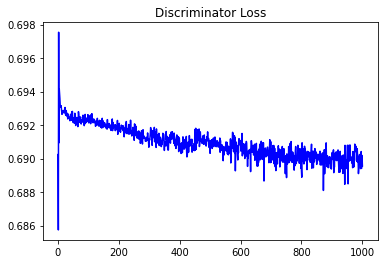

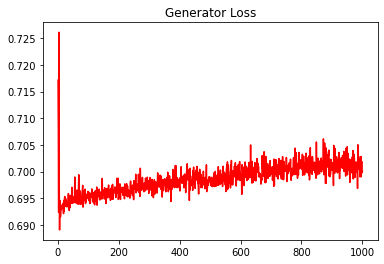

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1107609682980392


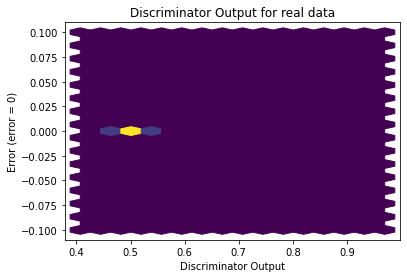

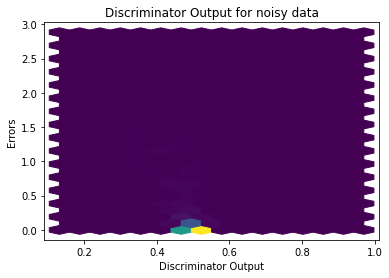

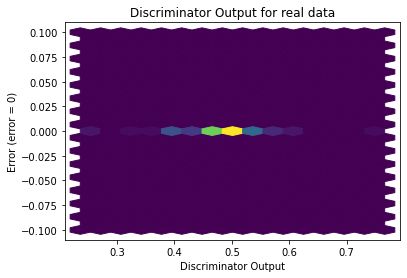

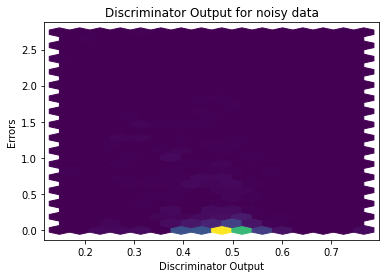

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


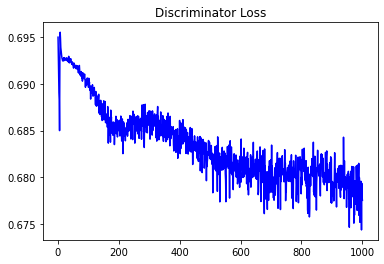

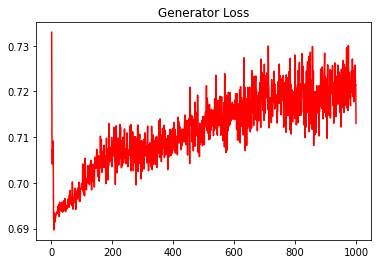

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.130567072686209


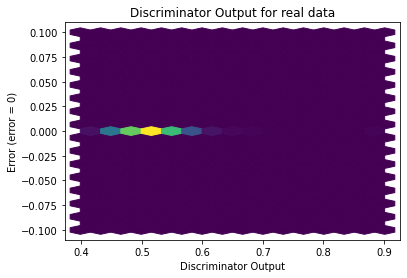

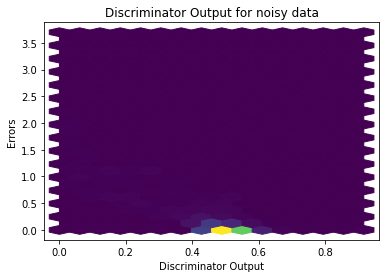

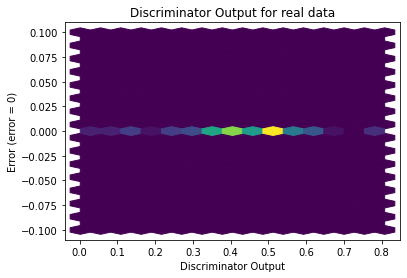

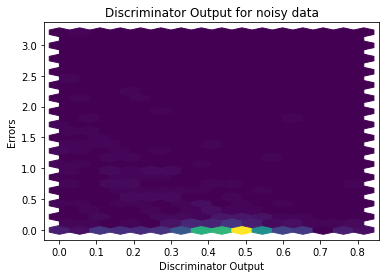

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3517]], requires_grad=True)
